In [1]:
import pandas  as pd
import numpy as  np
import matplotlib.pyplot as plt


In [3]:
#Read the Inpatient Dataset
train_inpatientdata=pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_inpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [4]:
train_inpatientdata.shape

(40474, 30)

In [5]:
train_inpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [6]:
train_inpatientdata.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [7]:
train_inpatientdata1=train_inpatientdata
cols=['AttendingPhysician','OperatingPhysician','OtherPhysician']
train_inpatientdata1["claim_has_at_least_one_physician"] = train_inpatientdata1[cols].notna().any(axis=1).map({True: 'Yes', False: 'No'})


In [8]:
c1=train_inpatientdata1.groupby('claim_has_at_least_one_physician').size()
print(c1)

claim_has_at_least_one_physician
No       106
Yes    40368
dtype: int64


Outcome:


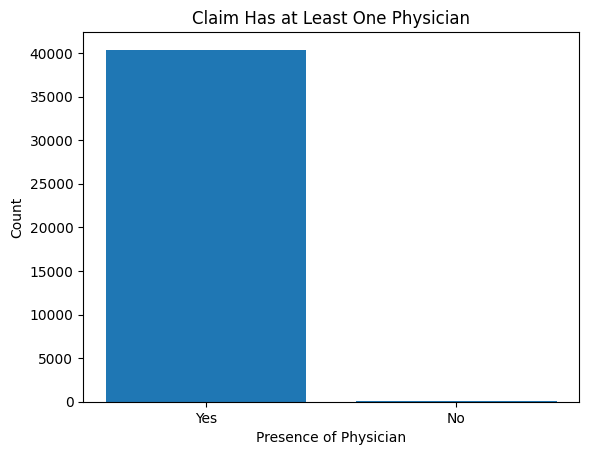

In [9]:
import matplotlib.pyplot as plt

# Count the number of 'Yes' and 'No' values in the column
counts = train_inpatientdata1['claim_has_at_least_one_physician'].value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values)

# Set plot title and labels
plt.title('Claim Has at Least One Physician')
plt.xlabel('Presence of Physician')
plt.ylabel('Count')

# Display the plot
plt.show()


In [10]:

from datetime import datetime
def calculate_days_between(df, start_col, end_col):
    start_dates = pd.to_datetime(df[start_col])
    end_dates = pd.to_datetime(df[end_col])
    delta = end_dates - start_dates
    return delta.dt.days


In [11]:

train_inpatientdata['claim_days'] = calculate_days_between(train_inpatientdata,'ClaimStartDt','ClaimEndDt')

In [13]:
print('Min claimday Train:- ',train_inpatientdata['claim_days'].min())
print('Max claimday Train:- ',train_inpatientdata['claim_days'].max())


Min claimday Train:-  0
Max claimday Train:-  36


OUTPATIENT DATA

In [14]:
train_outpatientdata=pd.read_csv('Train_Outpatientdata-1542865627584.csv')
train_outpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947


In [15]:
train_outpatientdata.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           418
OperatingPhysician        133574
OtherPhysician            101046
ClmDiagnosisCode_1          3292
ClmDiagnosisCode_2         61369
ClmDiagnosisCode_3         98463
ClmDiagnosisCode_4        122698
ClmDiagnosisCode_5        138605
ClmDiagnosisCode_6        146669
ClmDiagnosisCode_7        151589
ClmDiagnosisCode_8        154779
ClmDiagnosisCode_9        157254
ClmDiagnosisCode_10       161478
ClmProcedureCode_1        161779
ClmProcedureCode_2        161808
ClmProcedureCode_3        161818
ClmProcedureCode_4        161819
ClmProcedureCode_5        161820
ClmProcedureCode_6        161820
DeductibleAmtPaid              1
ClmAdmitDiagnosisCode     128963
dtype: int64

In [16]:
#Check if all the checkin and  out has happened on same days or not in outpatient data
train_outpatientdata['claim_days'] = calculate_days_between(train_outpatientdata,'ClaimStartDt','ClaimEndDt')

In [17]:
value_count=train_outpatientdata.groupby('claim_days').size()
value_count

claim_days
0     141995
1       3626
2       1295
3        823
4        709
5        467
6        375
7        798
8        393
9        446
10       311
11       300
12       279
13       302
14       845
15       316
16       350
17       268
18       255
19       212
20      7453
21         1
23         1
dtype: int64

In [18]:
train_inpatientdata["is_admitted"]=1
train_outpatientdata["is_admitted"]=0

In [19]:
train_beneficiarydata=pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
train_beneficiarydata.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [20]:
train_beneficiarydata.shape

(138556, 25)

In [21]:
train_beneficiarydata.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

The code lacks DOD but it cannot be removed or filtered.We will get the age which might play role in the datset model


In [22]:
#Adding a column is_dead  = 1  DOD is given else is_dead = 0
train_beneficiarydata.loc[train_beneficiarydata['DOD'].isnull(), 'Is_Dead'] = '0'
train_beneficiarydata.loc[(train_beneficiarydata['DOD'].notnull()), 'Is_Dead'] = '1'


In [23]:
train_beneficiarydata.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [24]:
#Let's work on the beneficiary dataset
train_beneficiarydata['RenalDiseaseIndicator'].unique()


array(['0', 'Y'], dtype=object)

In [25]:
#Lets change tehe RenalDisease Indicator to 0 and 1
train_beneficiarydata = train_beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)


In [26]:
#Lets look at other categorical  columns
train_beneficiarydata['ChronicCond_Alzheimer'].unique()

array([1, 2])

We observed that the dataset has eiter 1 or 2 so for false which is 2 we changed it to 0


In [27]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1
train_beneficiarydata = train_beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

MERGE THIS TWO DATASET INTO SINGLE DATASET


In [28]:
#MERGING INPATENT AND OUTPATIENT DATASET
train_allpatient=pd.merge(train_outpatientdata,train_inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode','is_admitted','claim_days'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode','is_admitted','claim_days']
                              ,how='outer')

In [29]:
train_allpatient.shape

(202294, 33)

In [30]:
train_allpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'claim_days', 'is_admitted', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode',
       'claim_has_at_least_one_physician'],
      dtype='object')

In [31]:
train_allpatient.isnull().sum()

BeneID                                   0
ClaimID                                  0
ClaimStartDt                             0
ClaimEndDt                               0
Provider                                 0
InscClaimAmtReimbursed                   0
AttendingPhysician                     530
OperatingPhysician                  150218
OtherPhysician                      136830
ClmDiagnosisCode_1                    3292
ClmDiagnosisCode_2                   61595
ClmDiagnosisCode_3                   99139
ClmDiagnosisCode_4                  124232
ClmDiagnosisCode_5                  141499
ClmDiagnosisCode_6                  151507
ClmDiagnosisCode_7                  158847
ClmDiagnosisCode_8                  164721
ClmDiagnosisCode_9                  170751
ClmDiagnosisCode_10                 198025
ClmProcedureCode_1                  179105
ClmProcedureCode_2                  196828
ClmProcedureCode_3                  201327
ClmProcedureCode_4                  202177
ClmProcedur

In [32]:
#MERGE THE DATASET WITH BENEFICIARY DATASET
train_withbeneficiary=pd.merge(train_allpatient,train_beneficiarydata,on='BeneID')
train_withbeneficiary.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Is_Dead
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,0,0,0,0,0,0,0,30,50,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,0,1,0,0,0,0,0,90,40,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,0,1,0,0,0,0,0,90,40,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,0,0,0,1810,760,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,0,0,0,1810,760,0


In [119]:
train_allpatient.shape

(558211, 34)

In [120]:
train_beneficiarydata.shape

(138556, 26)

In [121]:
train_withbeneficiary.shape

(558211, 59)

In [33]:
train_withbeneficiary.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'claim_days', 'is_admitted', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode', 'claim_has_at_least_one_physician',
       'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'C

In [123]:
train_withbeneficiary.isnull().sum()

BeneID                                   0
ClaimID                                  0
ClaimStartDt                             0
ClaimEndDt                               0
Provider                                 0
InscClaimAmtReimbursed                   0
AttendingPhysician                    1508
OperatingPhysician                  443764
OtherPhysician                      358475
ClmDiagnosisCode_1                   10453
ClmDiagnosisCode_2                  195606
ClmDiagnosisCode_3                  315156
ClmDiagnosisCode_4                  393675
ClmDiagnosisCode_5                  446287
ClmDiagnosisCode_6                  473819
ClmDiagnosisCode_7                  492034
ClmDiagnosisCode_8                  504767
ClmDiagnosisCode_9                  516396
ClmDiagnosisCode_10                 553201
ClmProcedureCode_1                  534901
ClmProcedureCode_2                  552721
ClmProcedureCode_3                  557242
ClmProcedureCode_4                  558093
ClmProcedur

In [34]:
#lets get the age for each beneficiary since there is no dod for all we will calcualte age with the claim start date
train_withbeneficiary['DOB'] =  pd.to_datetime(train_withbeneficiary['DOB'], format='%Y-%m-%d')
train_withbeneficiary['ClaimEndDt'] = pd.to_datetime(train_withbeneficiary['ClaimEndDt'], format='%Y-%m-%d')

#now = pd.to_datetime('2020-09-01' , format = '%Y-%m-%d')
train_withbeneficiary['DOB'] = train_withbeneficiary['DOB'].where(train_withbeneficiary['DOB'] < train_withbeneficiary['ClaimStartDt'])
train_withbeneficiary['age'] = (train_withbeneficiary['ClaimEndDt'] - train_withbeneficiary['DOB']).astype('<m8[Y]')


FINAL MERGE
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join

In [35]:
train=pd.read_csv('Train-1542865627584.csv')
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [36]:
train_ProviderWithPatientDetailsdata=pd.merge(train,train_withbeneficiary,on='Provider')

In [37]:
train_ProviderWithPatientDetailsdata.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Is_Dead,age
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,...,1,0,0,0,0,0,300,110,0,79.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,...,1,1,0,1,0,0,720,10,0,66.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,...,1,0,1,0,0,0,1380,370,0,76.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,...,1,0,0,0,2020,1068,6700,2700,0,73.0
4,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,1,0,0,1,36000,1068,3520,140,0,69.0


In [39]:
train_ProviderWithPatientDetailsdata.shape

(202294, 60)

In [38]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
a=train_ProviderWithPatientDetailsdata.isnull().sum()
print(a)

Provider                                 0
PotentialFraud                           0
BeneID                                   0
ClaimID                                  0
ClaimStartDt                             0
ClaimEndDt                               0
InscClaimAmtReimbursed                   0
AttendingPhysician                     530
OperatingPhysician                  150218
OtherPhysician                      136830
ClmDiagnosisCode_1                    3292
ClmDiagnosisCode_2                   61595
ClmDiagnosisCode_3                   99139
ClmDiagnosisCode_4                  124232
ClmDiagnosisCode_5                  141499
ClmDiagnosisCode_6                  151507
ClmDiagnosisCode_7                  158847
ClmDiagnosisCode_8                  164721
ClmDiagnosisCode_9                  170751
ClmDiagnosisCode_10                 198025
ClmProcedureCode_1                  179105
ClmProcedureCode_2                  196828
ClmProcedureCode_3                  201327
ClmProcedur

LETS DROP SOME COLUMN FROM THE FINAL DATASET

In [129]:
columns_to_drop=[]